In [ ]:
# Code to write a Python 2/3 compatible codebase
from __future__ import division, print_function, unicode_literals

In [ ]:
# Import necessary libraries

# Basic data manipulation libraries
try:
    import numpy as np
    import pandas as pd
except ImportError:
    !pip install numpy pandas
    import numpy as np
    import pandas as pd

# Basic data visualization libraries
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    !pip install matplotlib seaborn
    import matplotlib.pyplot as plt
    import seaborn as sns

# Set the style and color palette of the plots
sns.set_style("whitegrid")  # Set style for seaborn plots
sns.set_palette("husl")     # Set color palette for seaborn plots

### Import the data

Since the dataset does not include column labels, these are generated using the information provided in this [webpage](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names). The file is then imported.

This block of code is preparing a list of column names for a dataset, specifically the Breast Cancer Wisconsin (Diagnostic) dataset, which can be found at the provided URL. The dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. There are 30 features in total, described in ten real-valued features are computed for each cell nucleus.

The final col_names list will contain 32 strings. The first two are 'id' and 'diagnosis', followed by 30 feature names derived from the combinations of attribute types and value types (10 attributes * 3 value types).

Example of Final col_names List: [
 'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
 'smooth_mean', 'compact_mean', 'concavity_mean', 'conc_points_mean',
 'symmetry_mean', 'fractal_dim_mean', 'radius_se', 'texture_se', 'perimeter_se',
 ... (and so on)
]


So this code snippet is particularly useful when you want to load the dataset into a pandas DataFrame and want to assign meaningful column names for better understanding and manipulation of the dataset.


In [ ]:
# Import the product function from itertools to generate combinations
from itertools import product

# Base column names containing the ID and diagnosis
col_names = ['id', 'diagnosis']

# Attribute types represent different measurements related to cell nuclei in the breast mass
attribute_types = [
    'radius', 'texture', 'perimeter', 'area', 'smooth',
    'compact', 'concavity', 'conc_points', 'symmetry', 'fractal_dim'
]

# Value types represent the statistical measures of the attributes
value_types = ['_mean', '_se', '_worst']

# Utilizing a list comprehension and product to combine attribute types and value types
feature_names = [f"{attr}{val}" for attr, val in product(attribute_types, value_types)]

# Extending the base column names list with the generated feature names
col_names.extend(feature_names)

# Printing the final column names
print(col_names)

['id', 'diagnosis', 'radius_mean', 'radius_se', 'radius_worst', 'texture_mean', 'texture_se', 'texture_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_mean', 'area_se', 'area_worst', 'smooth_mean', 'smooth_se', 'smooth_worst', 'compact_mean', 'compact_se', 'compact_worst', 'concavity_mean', 'concavity_se', 'concavity_worst', 'conc_points_mean', 'conc_points_se', 'conc_points_worst', 'symmetry_mean', 'symmetry_se', 'symmetry_worst', 'fractal_dim_mean', 'fractal_dim_se', 'fractal_dim_worst']


In [ ]:
#Import data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None,
                 names = col_names)

### Exploring the data

An initial exploration of the data indicates that no missing values are present, since all rows have 569 values. <br> The id variable will be excluded from any model-building since it should not be relevant to our predictive analysis.

In [ ]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the number of rows and columns with a descriptive message
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 569 rows and 32 columns.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Configuring pandas display option to show all columns
pd.set_option('display.max_columns', None)  # Set to None to display ALL columns

# Function to explore the initial data
def explore_data(dataframe):
    print("First few rows of the dataset:")
    print(dataframe.head())  # Display first few rows of the dataset

    print("\nData Types of Each Column:")
    print(dataframe.dtypes)  # Display data types of each column

    print("\nStatistics of the Numerical Columns:")
    print(dataframe.describe())  # Display summary statistics of numerical columns

    print("\nMissing Values in Each Column:")
    print(dataframe.isnull().sum())  # Display count of missing values in each column

# Calling the function to explore data
explore_data(df)

# Converting the diagnosis variable to binary 0/1 coding
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype('int64')
print("\nDiagnosis variable after binary encoding:")
print(df['diagnosis'])

First few rows of the dataset:
         id diagnosis  radius_mean  radius_se  radius_worst  texture_mean  \
0    842302         M        17.99      10.38        122.80        1001.0   
1    842517         M        20.57      17.77        132.90        1326.0   
2  84300903         M        19.69      21.25        130.00        1203.0   
3  84348301         M        11.42      20.38         77.58         386.1   
4  84358402         M        20.29      14.34        135.10        1297.0   

   texture_se  texture_worst  perimeter_mean  perimeter_se  perimeter_worst  \
0     0.11840        0.27760          0.3001       0.14710           0.2419   
1     0.08474        0.07864          0.0869       0.07017           0.1812   
2     0.10960        0.15990          0.1974       0.12790           0.2069   
3     0.14250        0.28390          0.2414       0.10520           0.2597   
4     0.10030        0.13280          0.1980       0.10430           0.1809   

   area_mean  area_se  area_wor

In [ ]:
#Remove 'id' variable
df = df.drop('id', axis=1)

# Display the updated DataFrame to confirm the column removal
print("\nUpdated DataFrame:")
print(df.head())


Updated DataFrame:
   diagnosis  radius_mean  radius_se  radius_worst  texture_mean  texture_se  \
0          1        17.99      10.38        122.80        1001.0     0.11840   
1          1        20.57      17.77        132.90        1326.0     0.08474   
2          1        19.69      21.25        130.00        1203.0     0.10960   
3          1        11.42      20.38         77.58         386.1     0.14250   
4          1        20.29      14.34        135.10        1297.0     0.10030   

   texture_worst  perimeter_mean  perimeter_se  perimeter_worst  area_mean  \
0        0.27760          0.3001       0.14710           0.2419    0.07871   
1        0.07864          0.0869       0.07017           0.1812    0.05667   
2        0.15990          0.1974       0.12790           0.2069    0.05999   
3        0.28390          0.2414       0.10520           0.2597    0.09744   
4        0.13280          0.1980       0.10430           0.1809    0.05883   

   area_se  area_worst  smooth

As a next step, variable distributions are examined for potential transformation. Specifically, transforming feature variables to approximately normal distributions will improve their linear predictive fit for logistic regression, and will make these relationships more readily apparent to other algorithms.

Feature histograms and normal probability plots are used to produce the following final feature variables:
- no transformation: smooth_mean, smooth_worst, symmetry_mean, texture_worst
- square root transformation: radius_mean, texture_mean, perimeter_mean, concavity_mean, conc_points_mean, concavity_se, conc_points_se, concavity_worst, conc_points_worst
- cube root transformation: compact_mean,texture_se, compact_se,compact_worst
- log transformation: area_mean, fractal_dim_mean, radius_se,perimeter_se, area_se,smooth_se, symmetry_se, fractal_dim_se, radius_worst, perimeter_worst, symmetry_worst, area_worst, fractal_dim_worst

The least invasive transform that makes each variable approximately normal is used.

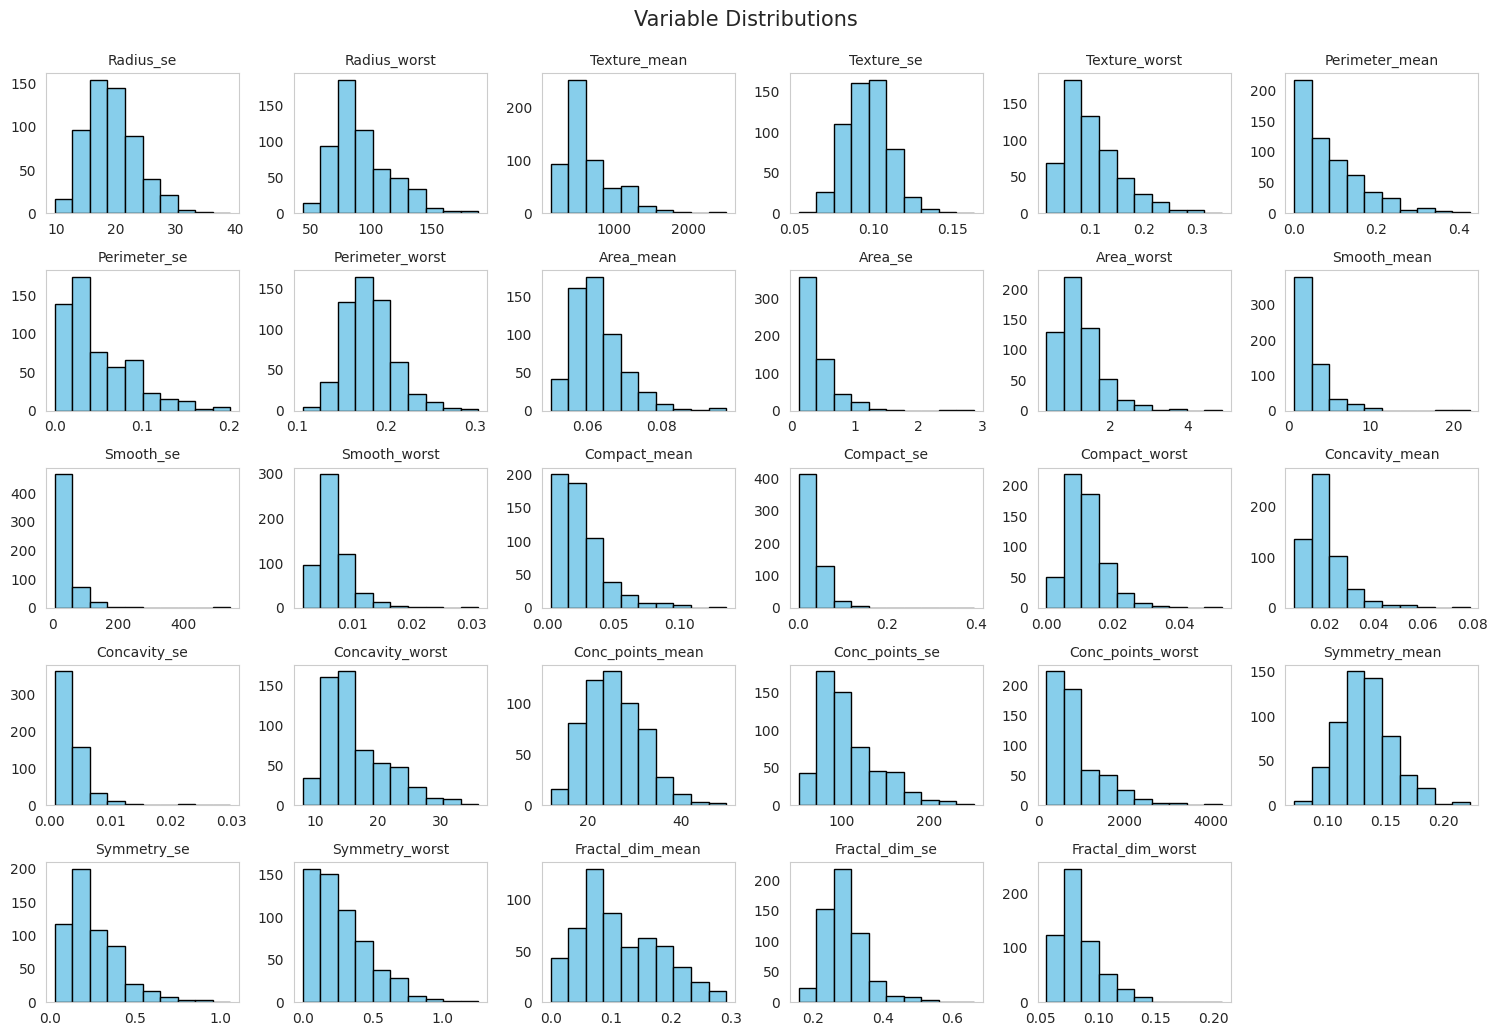

In [ ]:
# Function to plot variable distributions
def plot_variable_distributions(df):
    features = df.columns[1:]
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(features, 1):
        plt.subplot(5, 6, i)  # Adjust the grid size as per the number of features
        df[feature].hist(grid=False, color='skyblue', edgecolor='black')
        plt.title(feature.capitalize(), fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout(pad=1)
    plt.suptitle("Variable Distributions", fontsize=15, y=1.03)
    plt.show()

# Call the function to plot histograms of the DataFrame excluding the first column
plot_variable_distributions(df.iloc[:, 1:])

Reasonably normal distributions observed for smooth_mean, smooth_worst, symmetry_mean, symmetry_worst, and texture_worst.
First, square root transformations are examined for the remaining variables (excluding id and purchase).

The following code is used for generating probability plots (also known as Q-Q plots or quantile-quantile plots) of multiple variables to assess their distribution. The points on the plot represent the quantiles of your data against the quantiles of a standard normal distribution. This can be particularly useful for identifying whether the data follows a certain theoretical distribution (like a normal distribution).

In [ ]:
# Create a list of variables to exclude from transformation test
excluded_vars = ['id', 'diagnosis', 'smooth_mean', 'smooth_worst', 'symmetry_mean', 'texture_worst']

# Use a list comprehension to create a list of variables to test for transformation
test_transform = [var for var in df.columns if var not in excluded_vars]

# Optionally, print the list of variables to be tested for transformation
# print("Variables to test for transformation:", test_transform)

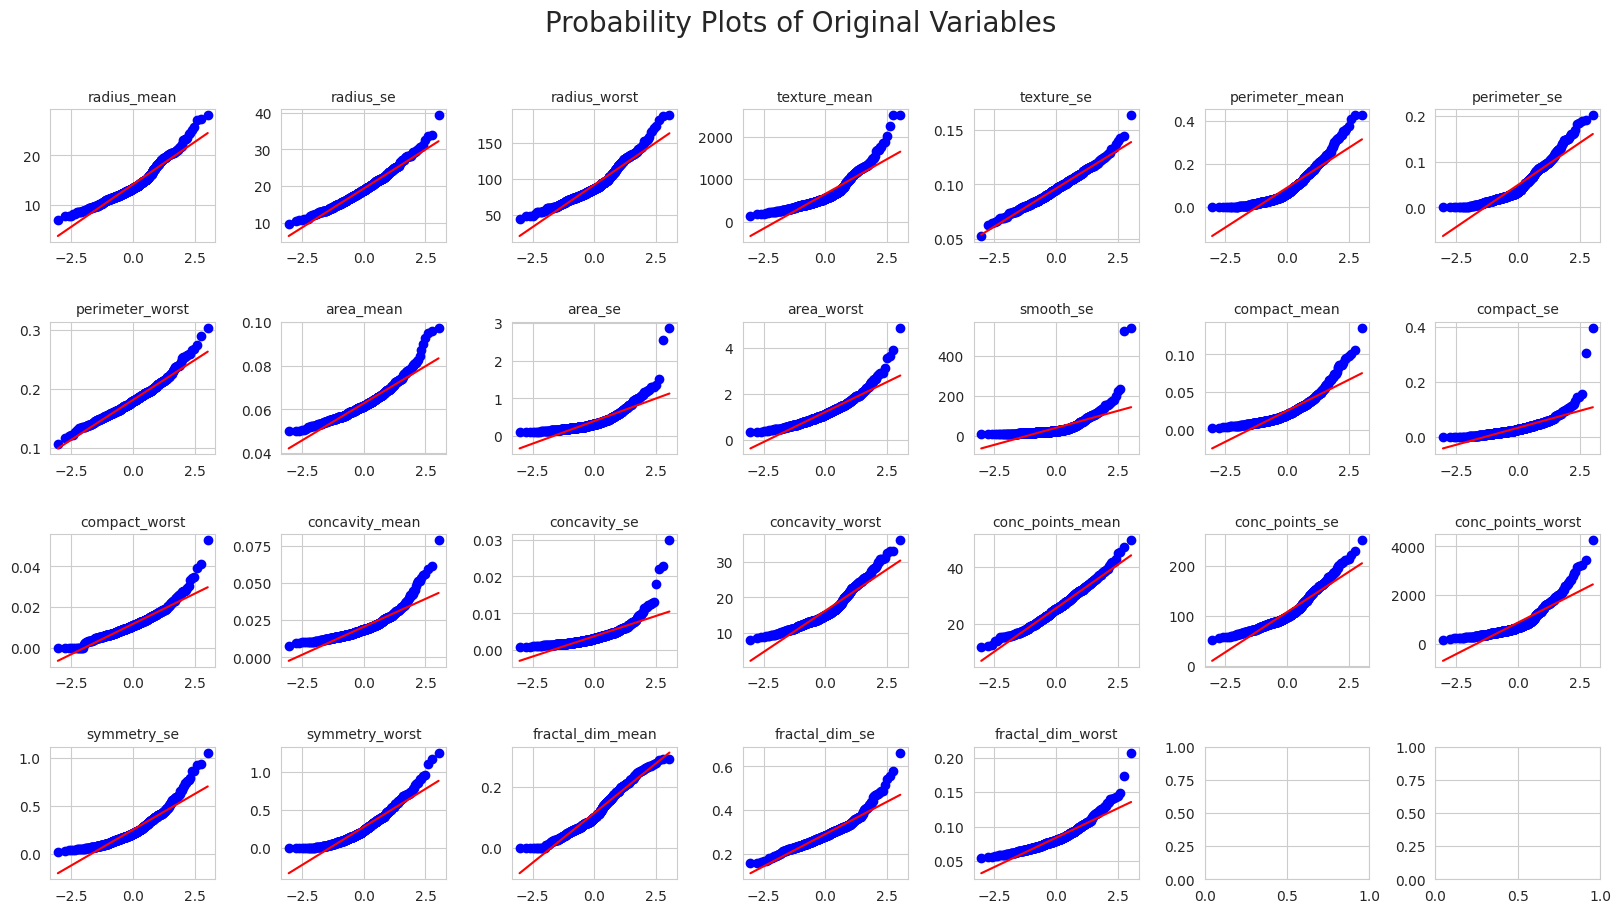

In [ ]:
# Improved probability plots for original variables
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Create a probability plot for each variable in test_transform
def plot_probability_plots(df, test_transform, plot_title):
    # Create a subplot grid
    fig, axes = plt.subplots(4, 7, figsize=(20, 10))

    # Adjust spacing between plots for better readability
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Set the main title for all subplots
    fig.suptitle(plot_title, fontsize=20)

    # Loop through the variables and create probability plots
    for ax, variable in zip(axes.flat, test_transform):
        probplot(df[variable], plot=ax)
        ax.set_title(variable, fontsize=10)
        ax.set_xlabel('')  # Optionally remove x-axis label for cleaner look
        ax.set_ylabel('')  # Optionally remove y-axis label for cleaner look

    # Display the plots
    plt.show()

# Call the function to create probability plots for the original variables
plot_probability_plots(df, test_transform, 'Probability Plots of Original Variables')

Square root transformations are particularly effective for dealing with right-skewed data. If the Q-Q plot shows a curvature that rises more steeply than the y=x line at the right end (higher quantiles), it’s an indication of positive skewness.

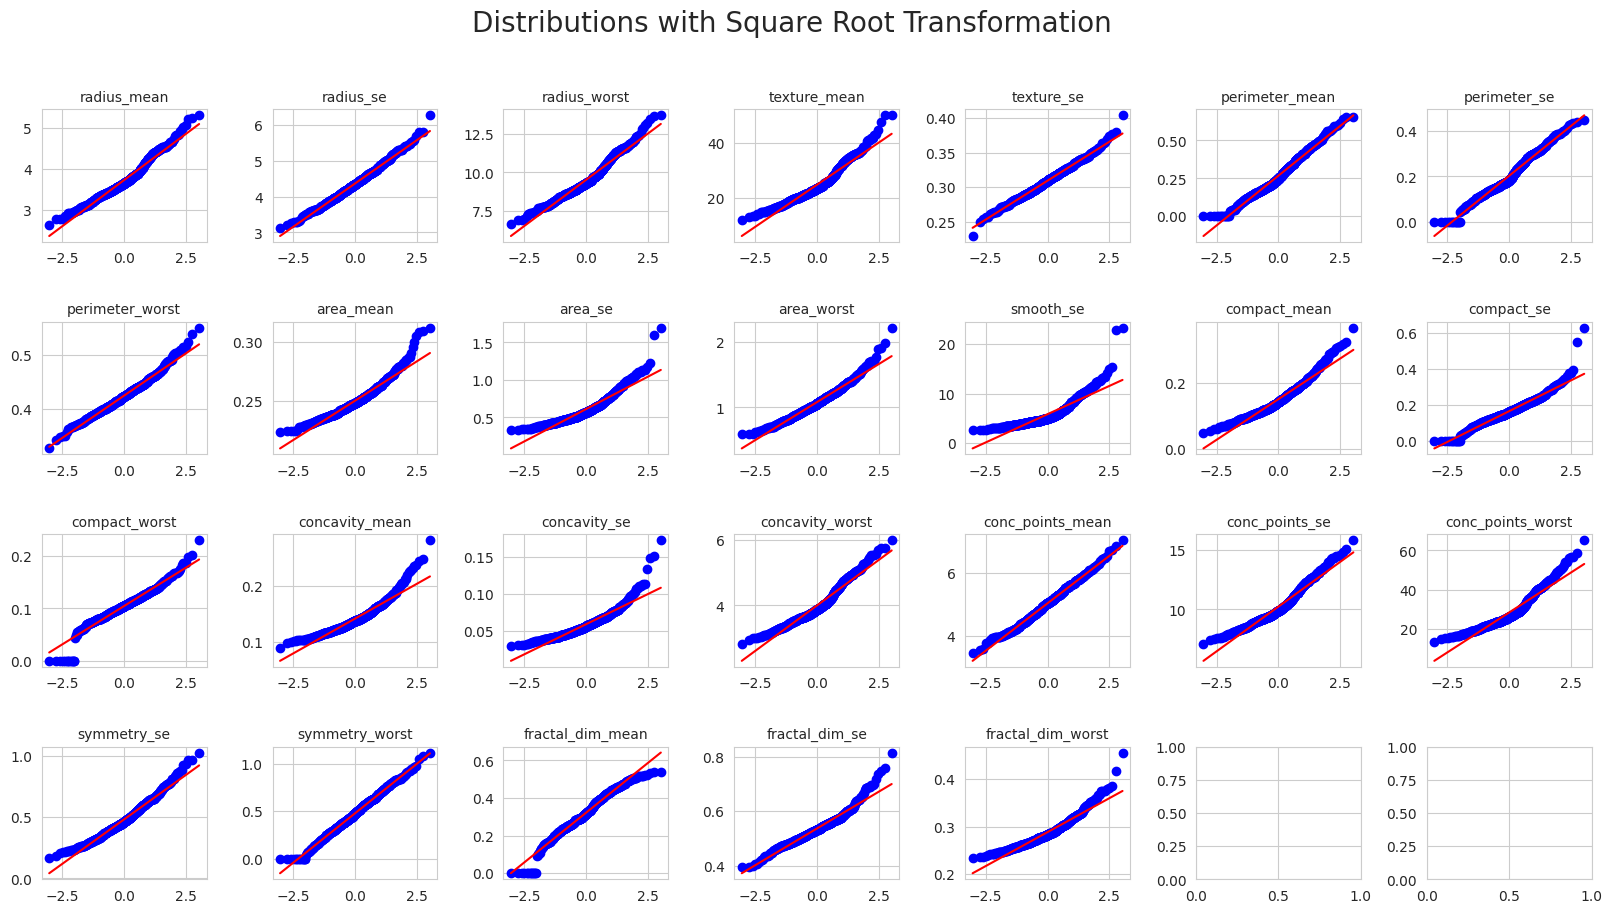

In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to Plot Probability Plots with Transformation
def plot_transformed_probability_plots(df, variables, transformation, transformation_name):
    """
    Generate probability plots for a list of variables after applying a given transformation.

    :param df: DataFrame containing the data
    :param variables: List of column names for which probability plots are to be generated
    :param transformation: Transformation function to apply to the data
    :param transformation_name: Name of the transformation, to be used in plot title
    """

    # Creating a subplot grid
    fig, axes = plt.subplots(4, 7, figsize=(20, 10))

    # Adjusting the spacing between the subplots for better readability
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Adding a main title for the entire figure
    fig.suptitle(f'Distributions with {transformation_name} Transformation', fontsize=20)

    # Looping through each variable and subplot axes
    for ax, var in zip(axes.flat, variables):
        # Creating a probability plot for the transformed variable
        stats.probplot(transformation(df[var]), plot=ax)

        # Setting the title for each subplot
        ax.set_title(var, fontsize=10)

        # Optionally, making the x and y-axis labels invisible for cleaner visuals
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Displaying the plots
    plt.show()

# List of Variables to be Transformed
test_transform = [col for col in df.columns if col not in ['id', 'diagnosis', 'smooth_mean', 'smooth_worst', 'symmetry_mean', 'texture_worst']]

# Calling the Function with Square Root Transformation
plot_transformed_probability_plots(df, test_transform, np.sqrt, 'Square Root')


After applying the square root transformation, you should create another Q-Q plot for the transformed data. If the transformed data points are closer to the straight line, it indicates that the transformation has made the distribution more normal.

The following variables are selected for square root transformation:
- radius_mean, texture_mean, perimeter_mean, concavity_mean, conc_points_mean, concavity_se, conc_points_se, concavity_worst, conc_points_worst
- for conc_points variables (mean, se and worst), no further transformation is used to avoid creating additional disjointed zero-values.

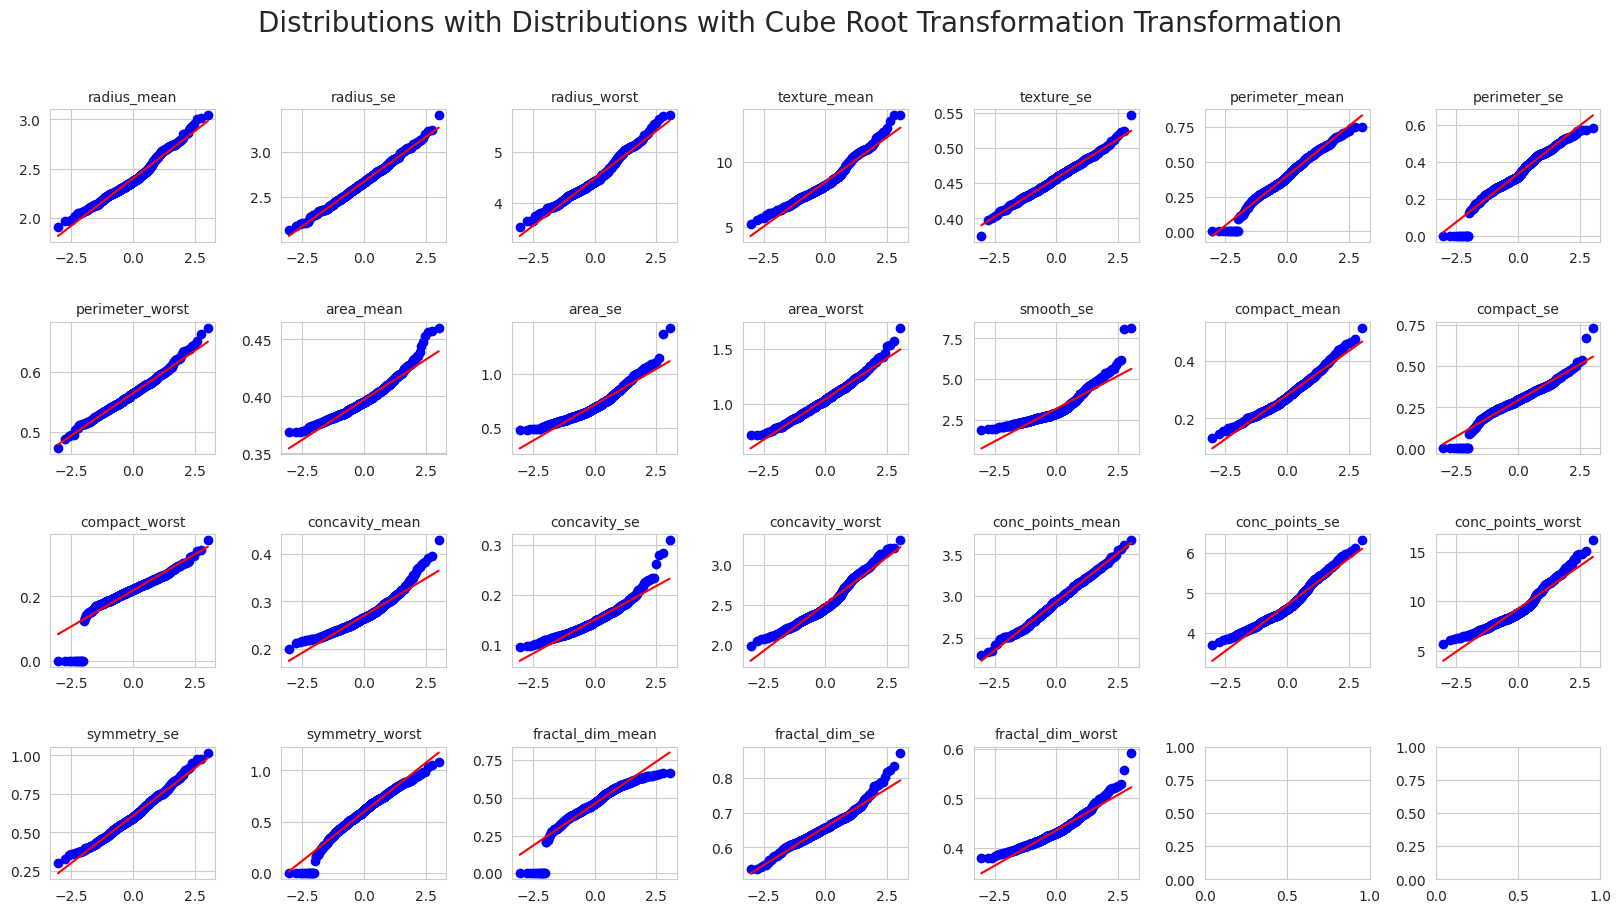

In [ ]:
# Call the function with np.cbrt as the transform function for cube root transformation
plot_transformed_probability_plots(df, test_transform, np.cbrt, "Distributions with Cube Root Transformation")

compact_mean, texture_se, compact_se, compact_worst are selected for cube root transformation.

For log transformation, a smaller subset of variables will be tested since variables that take on zero values can't be included.

In [ ]:
# subset relevant numeric variables that do not follow a normal distribution (based on df.hist above)
test_transform_log = ['radius_mean', 'perimeter_mean', 'area_mean', 'fractal_dim_mean', 'radius_se',
                   'perimeter_se', 'area_se', 'smooth_se', 'symmetry_se', 'fractal_dim_se', 'radius_worst',
                   'perimeter_worst', 'area_worst', 'symmetry_worst', 'fractal_dim_worst']

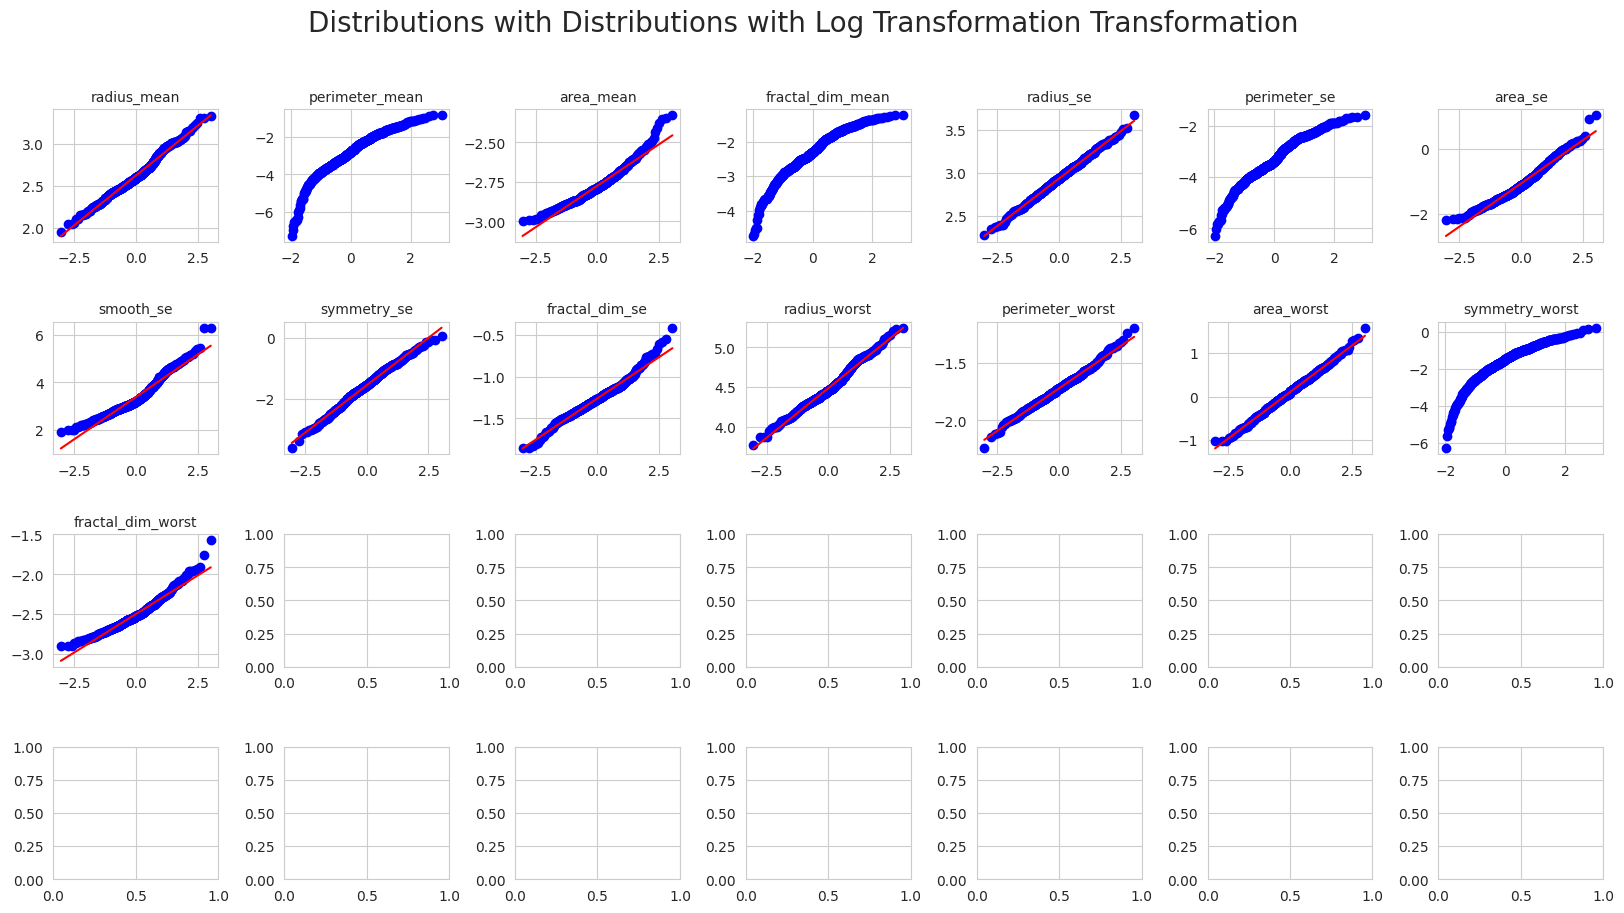

In [ ]:
# Call the function with np.cbrt as the transform function for log transformation
plot_transformed_probability_plots(df, test_transform_log, np.log, "Distributions with Log Transformation")

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

Log transformations are selected for area_mean, fractal_dim_mean, radius_se, perimeter_se, area_se,smooth_se, symmetry_se, fractal_dim_se, radius_worst, perimeter_worst, symmetry_worst, area_worst, fractal_dim_worst.

The selected transformations are updated for each variable, and the final data set created.

In [ ]:
# Create lists containing column names for each type of transformation
sqrt = ['radius_mean', 'texture_mean', 'perimeter_mean', 'concavity_mean', 'conc_points_mean',
        'concavity_se', 'conc_points_se', 'concavity_worst', 'conc_points_worst']
cbrt = ['compact_mean', 'texture_se', 'compact_se', 'compact_worst']
log = ['area_mean', 'fractal_dim_mean', 'radius_se', 'perimeter_se', 'area_se', 'smooth_se', 'symmetry_se',
       'fractal_dim_se', 'radius_worst', 'perimeter_worst', 'symmetry_worst', 'area_worst', 'fractal_dim_worst']


The following code defines a function transform_variable() to apply a specified transformation to a list of variables in a DataFrame. It aims to facilitate the process of transforming multiple variables using different mathematical transformations like square root, cube root, or logarithm.

In [ ]:
# Update variable transformations

# Square root transforms
for i in sqrt:
    colname = str(i) +'_sqrt'
    df[colname] = np.sqrt(df[i])

# Cube root transforms
for i in cbrt:
    colname = str(i) +'_cbrt'
    df[colname] = np.cbrt(df[i])

# Log transforms
for i in log:
    colname = str(i) +'_log'
    df[colname] = np.log1p(df[i])

In [ ]:
def drop_columns(df, columns_to_drop):
    """
    Drop specified columns from the DataFrame and print updated shape and columns.

    Parameters:
    - df: pandas DataFrame.
    - columns_to_drop: list of column names to be dropped.
    """
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    print("Updated DataFrame Shape:", df.shape)
    print("Updated Columns:\n", df.columns.tolist())

# Combine all columns to be dropped into a single list and drop them
columns_to_drop = sqrt_vars + cbrt_vars + log_vars
drop_columns(df, columns_to_drop)
df.shape

Updated DataFrame Shape: (569, 31)
Updated Columns:
 ['diagnosis', 'texture_worst', 'smooth_mean', 'smooth_worst', 'symmetry_mean', 'radius_mean_sqrt', 'texture_mean_sqrt', 'perimeter_mean_sqrt', 'concavity_mean_sqrt', 'conc_points_mean_sqrt', 'concavity_se_sqrt', 'conc_points_se_sqrt', 'concavity_worst_sqrt', 'conc_points_worst_sqrt', 'compact_mean_cbrt', 'texture_se_cbrt', 'compact_se_cbrt', 'compact_worst_cbrt', 'area_mean_log', 'fractal_dim_mean_log', 'radius_se_log', 'perimeter_se_log', 'area_se_log', 'smooth_se_log', 'symmetry_se_log', 'fractal_dim_se_log', 'radius_worst_log', 'perimeter_worst_log', 'symmetry_worst_log', 'area_worst_log', 'fractal_dim_worst_log']


(569, 31)

Then, we visualize the distributions of the transformed numerical variables.

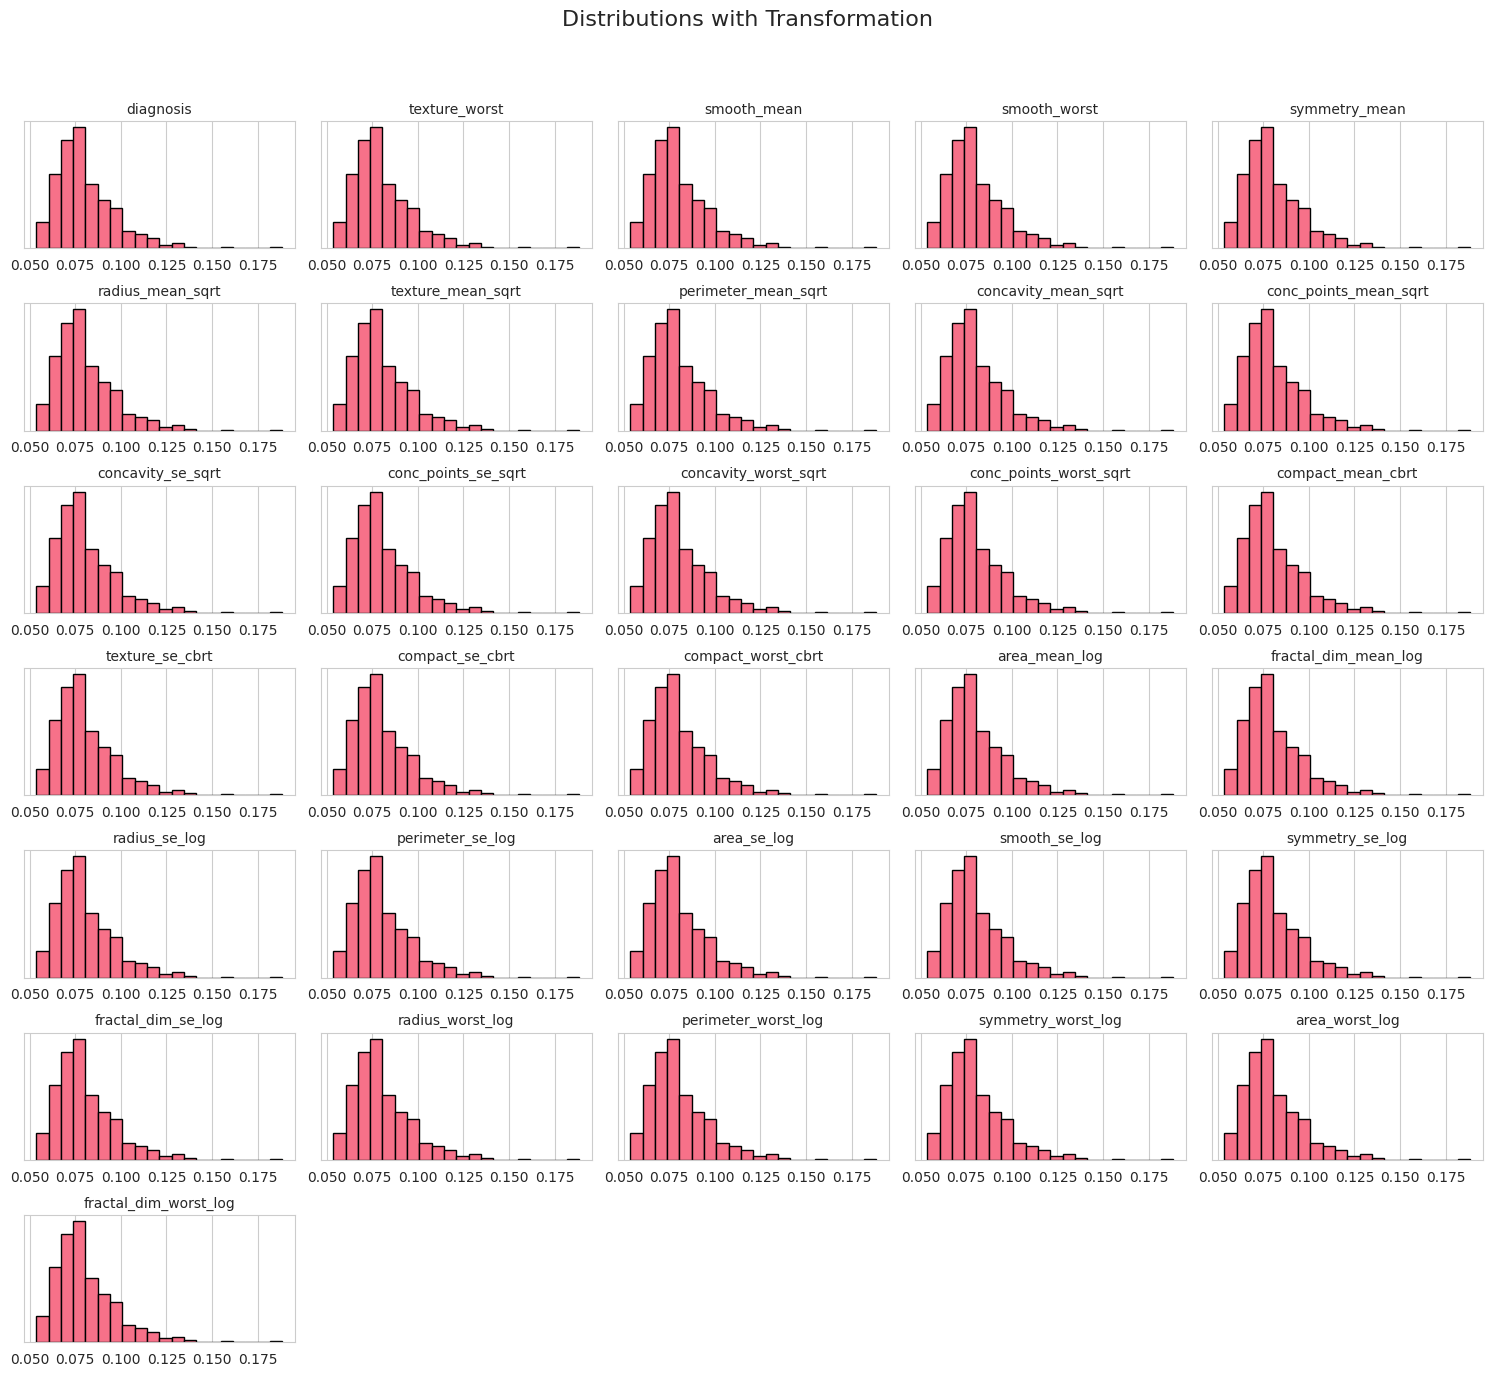

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).shape[1]  # Count of numerical columns
num_rows = int(np.ceil(num_cols / 5))  # Determine the number of rows needed for subplots

fig, axes = plt.subplots(num_rows, 5, figsize=(15, 2 * num_rows))  # Adjust the subplot grid size dynamically
fig.suptitle("Distributions with Transformation", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Increase spacing between plots

y_plot = df.select_dtypes(include=[np.number]).columns  # Get numeric columns only

# Loop through columns and make subplots
for ax, y in zip(axes.flat, y_plot):

    if not data.empty:  # Ensure that data is not empty after exclusion
        ax.hist(data, bins=20, edgecolor='k')  # Add edge color for better visualization
    ax.set_title(y, fontsize=10)
    ax.set_yticks([])  # Hide y ticks for a cleaner look

# Hide remaining empty subplots if any
for i in range(len(y_plot), num_rows * 5):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top spacing
plt.show()

Examining the values of the diagnosis variable (shown below), it is noted that there is slight unbalance present in the classes. Roughly 62% of observations fall in the benign outcome (value = 0). This indicates data stratification should be used when creating data subsets if possible, and examining model scoring measurements beyond just accuracy may be important.

The number of Benign cases is: 357
The number of Malignant cases is: 212


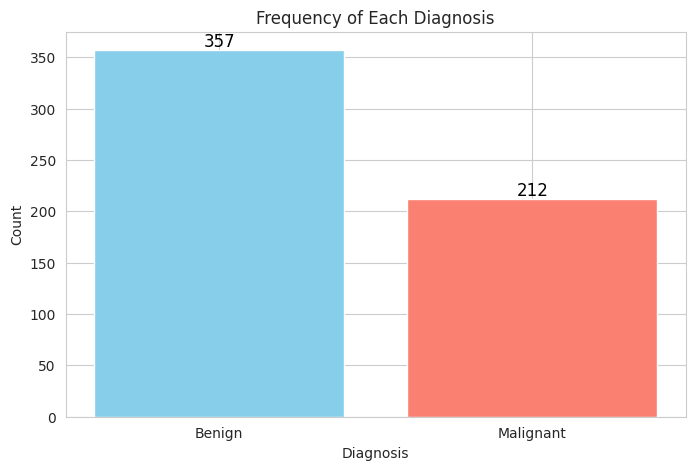

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each diagnosis
unique, counts = np.unique(df['diagnosis'], return_counts=True)
frequency = dict(zip(unique, counts))

# Print the frequency of each diagnosis with enhanced formatting
diagnosis_mapping = {0: "Benign", 1: "Malignant"}
for key, value in frequency.items():
    print(f"The number of {diagnosis_mapping[key]} cases is: {value}")

# Plot the frequency of each diagnosis using a bar plot
plt.figure(figsize=(8,5))
plt.bar(diagnosis_mapping.values(), counts, color=['skyblue', 'salmon'])

# Add labels and title to the plot
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Frequency of Each Diagnosis')

# Display the count on top of the bars
for i in range(len(unique)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

### Part (a): Nested holdout predictive performance

To begin model building, the target variable and features (all variables except id field and target) are defined. From here, nested holdout testing with limited parameter optimization is implemented for decision trees, k-NN and logistic regression.

Specifically, the data is split into three groups:
- training: 60% of total observations
- validation data: 20% of total observations
- test data: 20% of total observations

For each algorithm, the following parameter values are evaluated on the validation data using f-1 score.

In [ ]:
# Setup main attributes and target variable

X = df.iloc[:,1:] # full data set of original features to include in model building (only exclused id field & class label)
y = np.ravel(df[['diagnosis']]) # convert y to 1-D array for .fit

### Part (a): Nested Cross-validation predictive performance

Nested cross-validation is used to optimize parameter values based on f1 score, and estimate overall generalization performance for each classification technique. Five-fold cross validation is used across both inner and outer cross-validation layers due to the relatively small size of the data set (569 rows)

#### Part (b), Model 1: Decision tree

For the decision tree classifier, parameter tuning is used to find the optimal value from the following parameter entries:
- maximum tree depth
- minimum samples in leaf node


While this list is non-comprehensive, these constraints were felt to represent a reasonable array of choices that wouldn't lead to gross underfitting. A greater number of parameters and value choices can be evaluated in situations where more powerful processing resources are available.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

random_state=42

#Inner and outer 5 cross-validation splits
inner_cv = KFold(n_splits=5,shuffle=True,random_state=random_state)
outer_cv = KFold(n_splits=5,shuffle=True,random_state=random_state)

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                               'min_samples_leaf':[1, 2, 3, 4, 5, 6]
                               }],
                  scoring='f1_macro',
                  cv=inner_cv)

gs = gs.fit(X,y)
print("Parameter Tuning for Decision Tree")
print("Non-nested CV F1-score: ", gs.best_score_)
print("Optimal Parameter: ", gs.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs = cross_val_score(gs, X=X, y=y,scoring='f1_macro',  cv=outer_cv)
print("Nested CV F1-score: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())


 Parameter Tuning for Decision Tree
Non-nested CV F1-score:  0.9507403452207568
Optimal Parameter:  {'max_depth': 6, 'min_samples_leaf': 6}
Optimal Estimator:  DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)
Nested CV F1-score:  0.9412753375022407  +/-  0.003817865202776532


#### Part (b), Model 2: k-Nearest Neighbors

For the k-nn classifier, the data is first standardized. Then, parameter tuning is used to find the optimal value from the following parameter entries:
- k number of neighbors: 1, 3, 5, 7, 9, 11, 13, 15, 17, 19
- weights: uniform, distance

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

#Normalize Data with pipeline
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(p=2,
                           metric='minkowski'))
    ])

#Parameters to optimize
params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance']
    }

# Choosing k for kNN
gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='f1_macro',
                  cv=inner_cv)
#print(len(y))
gs_knn = gs_knn.fit(X,y)

print("\n Parameter Tuning for kNN")
print("Non-nested CV F1-score: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X, y=y,scoring='f1_macro', cv=outer_cv)
print("Nested CV F1-score: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 Parameter Tuning for kNN
Non-nested CV F1-score:  0.9622057935414402
Optimal Parameter:  {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])
Nested CV F1-score:  0.9544444546310509  +/-  0.01797357989003541


 We can also confirm that k-nn outperforms decision trees on average F1 score for predicting breast cancer diagnoses, and have the added advantage of the estimate's average (95.44%) and standard error (1.79%).

#### Part (b), Model 3: logistic regression
For logistic regression, the following parameter values are evaluated using parameter tuning:

- C i.e. inverse of regularization strength: 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 15, 50, 100, 500.
- The type of penalty function to use (L1, L2) is also optimized.


In [ ]:
# Hyperparameter tuning for Logistic Regression

# Choosing C parameter (i.e., regularization parameter) for Logistic Regression
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid={'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 , 100,
                                     1000, 10000, 100000, 1000000],
                               'penalty':['l1','l2']},
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=-1)

gs_lr = gs_lr.fit(X,y)
print("Non-nested CV F1-score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X, y=y,scoring='f1_macro', cv=outer_cv)
print("Nested CV F1-score:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


Non-nested CV F1-score:  0.9718839135867
Optimal Parameter:  {'C': 100, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
Nested CV F1-score: 0.969949731211341  +/-  0.013276794434288551


The optimal value of C using grid search is 100. This produces a logistic regression model with an F-1 score of 96.99%, with a standard deviation of 1.32%. This indicates that logistic regression outperforms both the decision tree and k-nn with the optimal value of C for this classification problem.

### Part (c): Learning curve for logistic regression

In [ ]:
# Code for function that plots learning curve
# Takes estimator e.g. logistic regression as input, plot title, X features and y target for prediction,
# y limits for y-axis (optional), specification for cross-validation folds (optional),
# The number or processing jobs to run in parallel (optional), and
# The scoring used to evaluate performance (optional, defaults to estimator default), and associated ylabel (optional)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                        scorer=None, ylab="Score"):
    # configure plot
    plt.figure() # set matplotlib figure
    plt.title(title) # set plot title
    if ylim is not None: # add y-limits
        plt.ylim(*ylim)
    plt.xlabel("Training examples") # add x-labels
    plt.ylabel(ylab) # add y-labels
    plt.grid(color='#E5E5E5') # show light gridlines

    # get cross-validated training and test score performance for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scorer)
    # get average values and standard deviatoin associated with training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # show filled confidence band around training and test scores
    # blue and orange shades used for color-blind friendly palette
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.05,
                     color="#de6011")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.10, color="#1171de")

    # plot training and test scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#de6011",
             label="Average Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#1171de",
             label="Average Test Score")
    # plot legend at best location
    plt.legend(loc="best")
    return plt

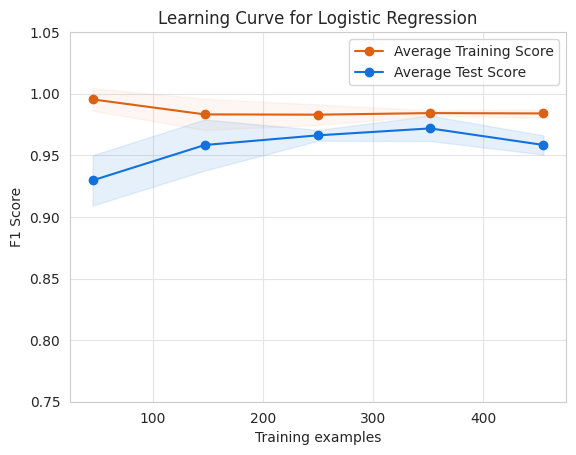

In [ ]:
# Additional libraries for learning curve plot
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

title = "Learning Curve for Logistic Regression"
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=random_state) # specify stratified cv indexes
# use estimator parameter values from part (b)
estimator = LogisticRegression(C=100, random_state=random_state, penalty='l2', solver='liblinear')
plot_learning_curve(estimator, title, X, y, (0.75, 1.05), cv=cv, n_jobs=4, scorer='f1_macro', ylab="F1 Score")

plt.show()

### Part (d): Fitting graph for decision tree

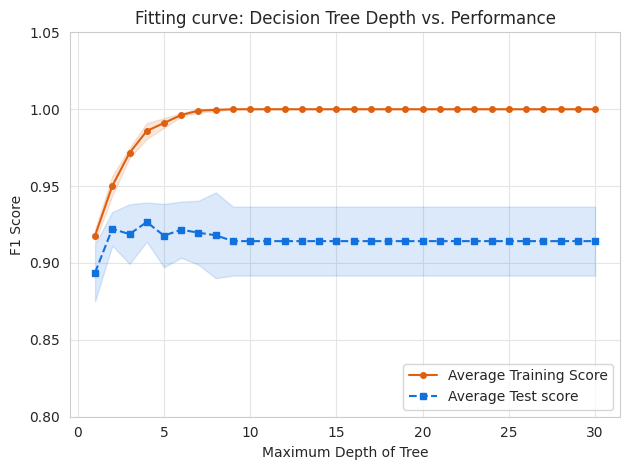

In [ ]:
# Fitting curve, code derived from instructor provided content

# Import validation curve
from sklearn.model_selection import validation_curve

# Specify possible parameter values for different tree depths.
# Chosen numbers 1-30
param_range= list(range(1,31,1))

# Determine training and test scores for varying parameter
# values using validation_curve
# The splitting criterion is set to entropy, but no other parameter
# constraints are set e.g. min_samples_leaf
# This is ensure the graph shows the tradeoff between complexity and
# performance for max_depth only
train_scores, test_scores = validation_curve(
                estimator=DecisionTreeClassifier(random_state=random_state, criterion='gini'), # specify estimator
                X = X, y = y, # set x and y values
                param_name = "max_depth", param_range = param_range, # specify parameter and values for testing
                cv= 5 ,               # 5-fold cross-validation due to small size of dataset
                scoring = "f1_macro", # evaluate on f-1
                n_jobs = 8)           # Number of CPU cores used for parallel processing.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# set up figure
plt.figure()

# Plot train accuracy means of cross-validation for
# all the parameter values of max depth
plt.plot(param_range, train_mean,
         color='#de6011', marker='o',
         markersize=4, label='Average Training Score')

# Fill the area around the line to indicate the size of
# standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='#de6011')

# Plot test accuracy means of cross-validation for
# all the parameters C in param_range
plt.plot(param_range, test_mean,
         color='#1171de', linestyle='--',
         marker='s', markersize=4,
         label='Average Test score')

# Fill the area around the line to indicate the size of
# standard deviations of performance for the test data
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='#1171de')

# Grid and Axes Titles
plt.grid(color='#E5E5E5')
#plt.xscale('Maximum Depth of Tree')
plt.legend(loc='lower right')
plt.title('Fitting curve: Decision Tree Depth vs. Performance')
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('F1 Score')
plt.ylim([0.8, 1.05]) # y limits in the plot
plt.tight_layout()
plt.show()

### Part (e): ROC curve for each classifier

In [ ]:
# Create classifiers for ROC curve

# Import additional dependencies
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold

# Used parameter values based on optimization results from nested
# cross-validation. However, this is being implemented
# in the same dataset, which will likely inflate the performane
# estimates across all classifiers. For comparative
# purposes, this may still show us which classifier performs relatively better.

# Decision Tree Classifier
clf1 = gs.best_estimator_

# kNN Classifier
clf2 = gs_knn.best_estimator_

# Logistic Regression Classifier
clf3 = gs_lr.best_estimator_

# Label the classifiers and group for looping
clf_labels = ['Decision tree', 'KNN', 'Logistic regression']
all_clf = [clf1, clf2, clf3]

10-fold cross validation:

ROC AUC: 0.95 (+/- 0.03) [Decision tree]
ROC AUC: 0.99 (+/- 0.01) [KNN]
ROC AUC: 1.00 (+/- 0.00) [Logistic regression]


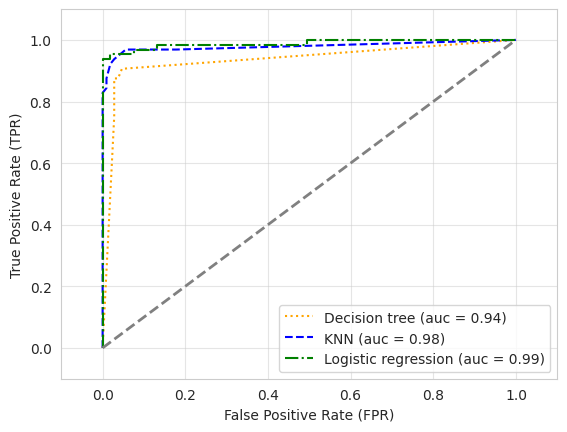

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Cross-validation and performance estimation
print('10-fold cross validation:\n')
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# Visualization of ROC curves
colors = ['orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

# Plot aesthetics
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

# Display plot
plt.show()